# 单变量线性回归

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# path = '‪C:/Users/huangm/Desktop/machine-learning-ex1/machine-learning-ex1/ex1/ex1data1.txt'
path = './ex1/ex1data1.txt'
# names添加列名，header用指定的行来作为标题，若原无标题且指定标题则设为None
data = pd.read_csv(path, header=None, names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [44]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


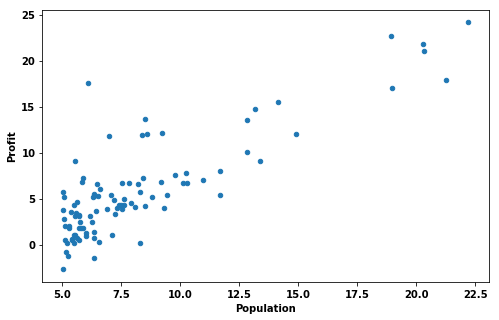

In [45]:
data.plot(kind='scatter', x = 'Population', y = 'Profit', figsize=(8,5))
plt.show()

创建一个以参数θ为特征函数的代价函数
$$ J(\theta) = \sum_{i=1}^m \frac{1}{2m}(h_\theta(x^{(i)}) - y^{(i)}) ^2  $$

$$ h_\theta(x) = \theta^TX = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$

计算代价函数
$$ J(\theta) $$


In [46]:
def compute_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y),2)
    return np.sum(inner) / (2 * len(X))

In [47]:
#在训练集中添加一列(x_0)，以便我们可以使用向量化的解决方案来计算代价和梯度
data.insert(0, 'Ones', 1)

In [48]:
# 取最后一列为 y，其余为 X
cols  =  data.shape[1] #列数
print(data.shape)
print(cols)
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

# 查看训练集X和label y
X.head()

(97, 3)
3


,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [49]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [50]:
# 代价函数是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix([1,2])
theta.T

matrix([[1],
        [2]])

In [51]:
# 查看一下维度
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

In [52]:
#计算初始代价函数的值 (theta初始值为0).
compute_cost(X, y, theta)

75.20338497891959

matrix的优势就是相对简单的运算符号，比如两个矩阵相乘，就是用符号*，但是array相乘不能这么用，得用方法.dot()
array的优势就是不仅仅表示二维，还能表示3、4、5…维，而且在大部分Python程序里，array也是更常用的。

两者区别：

对应元素相乘：matrix可以用np.multiply(X2,X1)，array直接X1*X2
点乘：matrix直接X1*X2，array可以 X1@X2 或 X1.dot(X2) 或 np.dot(X1, X2)

# batch gradient decent（批量梯度下降）

代价函数
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) ^2  $$

假设函数
$$ h_\theta(x) = \theta^TX = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $$

求偏导
$$ \frac{\partial }{\partial \theta_0}J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) $$
$$ \frac{\partial }{\partial \theta_1}J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_1{(i)} $$

梯度下降
$$ \theta_0 = \theta_0 - \alpha \frac{\partial }{\partial \theta_0}J(\theta) $$

$$ \theta_0 = \theta_0 - \alpha  \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})  $$

$$ \theta_1 = \theta_1 - \alpha \frac{\partial }{\partial \theta_1}J(\theta) $$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_1{(i)} $$

In [53]:
#使用 vectorization同时更新所有的 θ，可以大大提高效率

In [54]:
# np.flatten 返回一个折叠成一维的数组。但是该函数只能适用于numpy对象

In [55]:
def gradient_descent(X, y, theta, alpha, epoch):
    """return theta cost"""

    temp = np.zeros(theta.shape) # 临时矩阵[1,2]
    cost = np.zeros(epoch) # 每一轮epoch的cost
    m = X.shape[0] # 样本数量

    for i in range(epoch):
        # 利用向量化一步求解
        temp = theta - (alpha / m) * (X * theta.T - y).T * X

        theta = temp
        cost[i] = compute_cost(X, y, theta)

    return theta, cost

In [56]:
# 学习速率α和要执行的迭代次数
alpha = 0.01
epoch = 1000

In [57]:
# 梯度下降算法来将我们的参数θ适合于训练集
final_theta, cost = gradient_descent(X, y, theta, alpha, epoch)
final_theta, cost

(matrix([[-3.11118613,  1.11421259]]),
 array([8.70755848, 6.59911918, 6.52533071, 6.51586249, 6.50845247,
        6.50113311, 6.49384213, 6.48657747, 6.47933899, 6.47212657,
        6.46494014, 6.45777959, 6.45064483, 6.44353578, 6.43645233,
        6.42939439, 6.42236187, 6.41535469, 6.40837274, 6.40141595,
        6.39448421, 6.38757744, 6.38069555, 6.37383844, 6.36700604,
        6.36019824, 6.35341497, 6.34665612, 6.33992163, 6.33321139,
        6.32652532, 6.31986333, 6.31322534, 6.30661126, 6.300021  ,
        6.29345448, 6.28691162, 6.28039232, 6.2738965 , 6.26742408,
        6.26097497, 6.25454909, 6.24814636, 6.24176669, 6.23541   ,
        6.2290762 , 6.22276522, 6.21647698, 6.21021138, 6.20396835,
        6.1977478 , 6.19154967, 6.18537385, 6.17922029, 6.17308888,
        6.16697957, 6.16089225, 6.15482687, 6.14878333, 6.14276156,
        6.13676148, 6.13078301, 6.12482608, 6.1188906 , 6.1129765 ,
        6.10708371, 6.10121213, 6.09536171, 6.08953236, 6.08372401,
        6

In [58]:
compute_cost(X, y, final_theta)

4.533014230889452

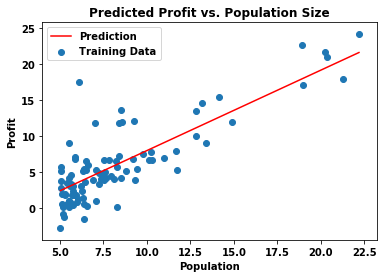

In [59]:
# 绘制线性模型以及数据，直观地看出它的拟合
x = np.linspace(data.Population.min(), data.Population.max(), 100) # 横坐标
f = final_theta[0, 0] + (final_theta[0, 1] * x) # 纵坐标

fig = plt.figure()
ax = plt.axes()

ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data['Population'], data['Profit'], label='Training Data')

ax.legend(loc=2) # 2表示在左上角
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 
请注意，线性回归中的代价函数总是降低的 - 这是凸优化的特点

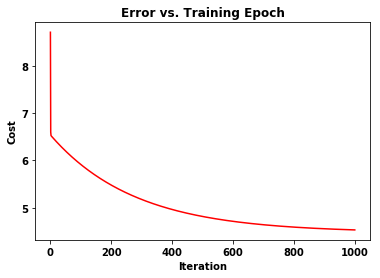

In [60]:
fig = plt.figure()
ax = plt.axes()

ax.plot(np.arange(epoch), cost, 'r')

ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 多变量线性回归

In [61]:
#练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）
path = './ex1/ex1data2.txt'
data2 = pd.read_csv(path, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [62]:
#pandas mean 均值
#pandas std   标准差
# 特征归一化
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [63]:
# 添加偏置单元x_0
data2.insert(0, 'Ones', 1)
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [64]:
# 获得列数
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
Y2 = data2.iloc[:, cols-1:cols]

In [65]:
# 从pd取出数据成为矩阵
X2 = np.matrix(X2.values)
y2 = np.matrix(Y2.values)

In [66]:
# theta = np.matrix(np.array([0,0,0]))
theta = np.matrix([0,0,0])

In [67]:
# 学习率和迭代次数
alpha = 0.01
epoch = 1000

In [68]:
# 代价函数
def compute_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y),2)
    return np.sum(inner) / (2 * len(X))

求偏导
$$ \frac{\partial }{\partial \theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j{(i)} $$

梯度下降
$$ \theta_j = \theta_j - \alpha \frac{\partial }{\partial \theta_j}J(\theta) $$

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j{(i)} $$

In [69]:
X2.shape, y2.shape, theta.shape

((47, 3), (47, 1), (1, 3))

In [70]:
def gradient_descent(X, y, theta, alpha, epoch):
    """return theta cost"""

    temp = np.zeros(theta.shape) # 临时矩阵[1,2]
    cost = np.zeros(epoch) # 每一轮epoch的cost
    m = X.shape[0] # 样本数量

    for i in range(epoch):
        # 利用向量化一步求解
        temp = theta - (alpha / m) * (X * theta.T - y).T * X

        theta = temp
        cost[i] = compute_cost(X, y, theta)

    return theta, cost

In [71]:
final_theta, cost2 = gradient_descent(X2, y2, theta, alpha, epoch)
final_theta, cost2

(matrix([[-1.10995657e-16,  8.78503652e-01, -4.69166570e-02]]),
 array([0.4805491 , 0.47198588, 0.46366462, 0.45557814, 0.44771948,
        0.44008189, 0.43265881, 0.42544389, 0.41843096, 0.41161404,
        0.40498735, 0.39854524, 0.39228228, 0.38619317, 0.38027278,
        0.37451612, 0.36891839, 0.36347488, 0.35818107, 0.35303254,
        0.34802503, 0.34315438, 0.33841659, 0.33380775, 0.32932407,
        0.3249619 , 0.32071767, 0.31658793, 0.31256934, 0.30865863,
        0.30485268, 0.30114841, 0.29754287, 0.29403318, 0.29061655,
        0.28729027, 0.28405173, 0.28089837, 0.27782772, 0.27483739,
        0.27192505, 0.26908845, 0.26632541, 0.26363379, 0.26101154,
        0.25845666, 0.25596722, 0.25354134, 0.25117719, 0.248873  ,
        0.24662705, 0.24443769, 0.24230329, 0.24022228, 0.23819315,
        0.23621442, 0.23428466, 0.23240248, 0.23056652, 0.22877549,
        0.22702811, 0.22532316, 0.22365943, 0.22203576, 0.22045104,
        0.21890417, 0.21739409, 0.21591977, 0.214480

In [72]:
# 计算梯度下降后给定theta的代价函数
compute_cost(X2, y2, final_theta)

0.13070336960771892

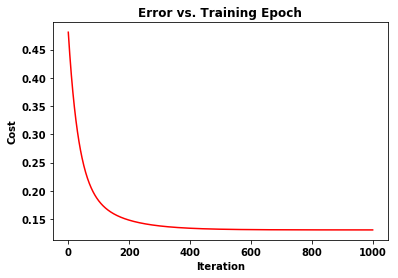

In [73]:
# 可视化 cost
fig = plt.figure()
ax = plt.axes()
ax.plot(np.arange(epoch), cost2, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [74]:
#使用scikit-learn的线性回归函数  以单变量为例
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
#scikit-learn model的预测表现

In [76]:
x = np.array(X[:, 1].A1) # 取出所有特征x_1的值
y = model.predict(X).flatten()
y

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

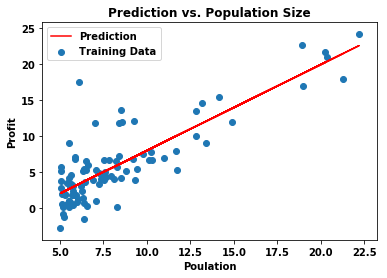

In [77]:
figure = plt.figure()
ax = plt.axes()

ax.plot(x ,y ,'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Training Data')
ax.set_xlabel('Poulation')
ax.set_ylabel('Profit')
ax.set_title('Prediction vs. Population Size')
plt.legend(loc=2)
plt.show()

# normal equation（正规方程）

正规方程是通过求解下面的方程来找出使得代价函数最小的参数的
$$ \frac {\partial }{\partial \theta_j}J(\theta) $$

假设我们的训练集特征矩阵为X, 并且我们的训练集结果为向量 y，则利用正规方程解出向量:
$$ \theta = (X^TX)^{-1}X^Ty $$

上标T代表矩阵转置,上标-1 代表矩阵的逆,设矩阵A = X^T * X  (X^T*X)^-1 = A^-1

#### 梯度下降和正规方程比较：  
梯度下降：缺点（需要学习率，需要大量迭代）优点，在特征数量较大时，也能有不错的表现，适合各类模型  
正规方程：优点（不需要学习率，不需要迭代，一次求解就能求到\theta） 缺点（大量特征时，矩阵逆的计算时间复杂度是O(n^3),通常来说n小于10000
是可以接受的，只用于线性模型，不适合逻辑回归等其他模型）

np.linalg 模块下常用的有连个函数   
1. np.linalg.inv()：矩阵求逆   
2. np.linalg.det()：矩阵求行列式（标量）    

numpy的矩阵相乘中看到@的矩阵乘法

In [78]:
# 正规方程
def normal_equation(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y  # X.T@X 相当于X.T.dot(X)
    return theta

In [79]:
ne_theta = normal_equation(X, y)
ne_theta

matrix([[-3.89578088,  1.19303364]])

In [80]:
# 梯度下降的 matrix([[-3.11118613,  1.11421259]]),